<a href="https://colab.research.google.com/github/mozartMiBciBA/HolaMozart/blob/master/Ej4_ClasificarImagenas_2Etiquetas_Keras_Tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fuente:https://www.youtube.com/watch?v=vjNaCJh7Ka4&list=PLgHCrivozIb1JHVHzgvuuFXsTIUvtaQJg&index=3

**Este programa permite subir una carpeta (archivo) con imagenes**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving pandas-tigres.zip to pandas-tigres.zip


!pwd es para saber donde andamos en cuestión de directorios

In [2]:
!pwd

/content


Para descomprimir

In [3]:
import zipfile 

Para tener acceso a los archivos

In [4]:
import io

Para cargar archivos

In [5]:
data= zipfile.ZipFile(io.BytesIO(uploaded['pandas-tigres.zip']), 'r')
data.extractall()

Despues de correr la linea anterior revisar que ya se descomprimieron los directorios de pandas-tigres.zip

**Ahora vamos a leer las imagenens, guardarlas en un arreglo y llamarlas para poder ver las imagenes**








// Se utiiza para tratamiento imagenes en python

In [7]:
import cv2 

// os se utiliza para poder utilizar los directorios

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt

ruta_tigres= "/content/tigres"
tigres= []
img_size=150

# Ciclo for permite hacer lo mismo para cada una de las imagenes dentro de la carpeta tigres
for img in os.listdir(ruta_tigres):
  img= cv2.imread(os.path.join(ruta_tigres, img))
  #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_resize = cv2.resize(img,(img_size, img_size))
  tigres.append(img_resize)

tigres=np.array(tigres)
#print(len(tigres_training))
print(tigres.shape)


(6, 150, 150, 3)


In [12]:
ruta_pandas= "/content/pandas"
pandast= []
img_size=150

# Ciclo for permite hacer lo mismo para cada una de las imagenes dentro de la carpeta pandas
for img in os.listdir(ruta_pandas):
  img= cv2.imread(os.path.join(ruta_pandas, img))
  #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_resize = cv2.resize(img,(img_size, img_size))
  pandast.append(img_resize)

pandast= np.array(pandast)
#print(np.shape(pandas_training))
print(pandast.shape)


(15, 150, 150, 3)


Para ver en una imagen de *pandas*

(150, 150, 3)


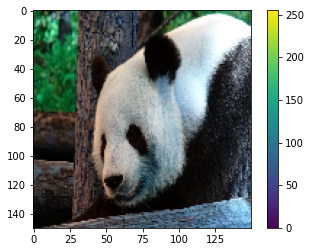

In [14]:
print(pandast[3].shape)
plt.figure()
# np.squeeze: es porque se tenia un formato de 4 dimensiones se pasa a 3
# y se representa graficamente
plt.imshow(np.squeeze(pandast[4]))
plt.colorbar()
plt.grid(False)
plt.show()

Para ver una imagen de tigres

(150, 150, 3)


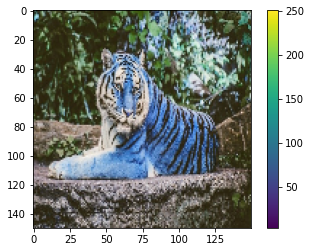

In [15]:
print(tigres[2].shape)
plt.figure()
# np.squeeze: es porque se tenia un formato de 4 dimensiones se pasa a 3
# y se representa graficamente
plt.imshow(np.squeeze(tigres[4]))
plt.colorbar()
plt.grid(False)
plt.show()

**Clasificación de imagenes**

Concatenar listas de tigres y pandas

In [16]:
images = np.concatenate([tigres,pandast])
#Ver cuantas imagenes se tienen en total
print(len(images))
# Convertir a un array la lista images
Images = np.array(images)
#Imprimir la forma del arreglo Images
#Se tienen 21 imagenes tamaño 150x150 con tres canales de colores 
print(Images.shape)


21
(21, 150, 150, 3)


In [17]:
#Agregar etiquetas a las imagenes de tigres (asignar un "0" a tigres)
etiquetas_tigres= np.repeat(0,6)
print(len(etiquetas_tigres))
print(etiquetas_tigres)

6
[0 0 0 0 0 0]


In [18]:
#Agregar etiquetas a los pandas (asignar un "1" a pandas)
etiquetas_pandas= np.repeat(1,15)
print(len(etiquetas_pandas))
print(etiquetas_pandas)

15
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [19]:
#Poner nombre a las clases
class_names= ['Tigre', 'Panda']


In [20]:
#Poner todas las etiquetas en una sola lista
labels = np.concatenate([etiquetas_tigres, etiquetas_pandas])
print(len(labels))
print(labels)
#convertir labels a un arreglo
Labels = np.array(labels)
print(Labels.shape)


21
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(21,)


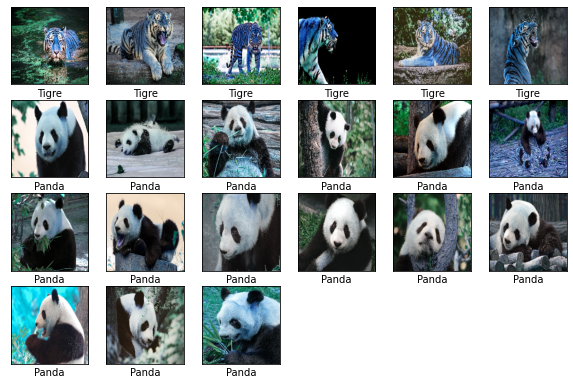

In [21]:
#Ver acomodo de figuras junto con su nombre
plt.figure(figsize= (10,10))
for i in range (21):
  #plt.subplot(5,5,i+1)
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Images[i])
  # cmap = plt.cm.binary
  plt.xlabel(class_names[Labels[i]])



In [23]:
#Inicialización de librerias de TF

from __future__ import absolute_import, division, print_function, unicode_literals

variable_name = ""
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals


# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import tensorflow.keras.optimizers as Optimizer

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
print("tf.__version__")
print(tf.__version__)

tf.__version__
2.5.0


In [24]:
#Entrenamiento

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150,3)),
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(2, activation='softmax'),
    
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(Images, Labels, epochs=30)
trained=model.fit(Images, Labels, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 59.9243 - accuracy: 0.6667
Epoch 2/30
1/1 [==============================] - 0s 57ms/step - loss: 20385.0352 - accuracy: 0.2857
Epoch 3/30
1/1 [==============================] - 0s 55ms/step - loss: 199.2508 - accuracy: 0.7619
Epoch 4/30
1/1 [==============================] - 0s 54ms/step - loss: 4216.6035 - accuracy: 0.7143
Epoch 5/30
1/1 [==============================] - 0s 79ms/step - loss: 4457.5586 - accuracy: 0.7143
Epoch 6/30
1/1 [==============================] - 0s 58ms/step - loss: 3824.0872 - accuracy: 0.7143
Epoch 7/30
1/1 [==============================] - 0s 69ms/step - loss: 2875.0583 - accuracy: 0.7143
Epoch 8/30
1/1 [==============================] - 0s 73ms/step - loss: 1753.1147 - accuracy: 0.7143
Epoch 9/30
1/1 [==============================] - 0s 56ms/step - loss: 805.1783 - accuracy: 0.7143
Epoch 10/30
1/1 [==============================] - 0s 56ms/step - loss: 13.7137 - accuracy: 0.8571
Epoch 

In [31]:
#Vamos a probar el modelo con una imagen
img = Images[10]
#Se revisa la forma de una imagen
print(img.shape)
#Se expande la imagen y se revisa su forma
img= (np.expand_dims(img,0))
print(img.shape)


(150, 150, 3)
(1, 150, 150, 3)


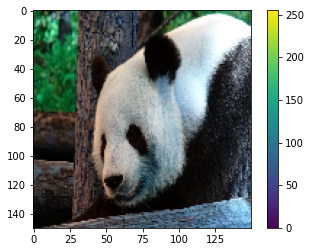

In [32]:
#Revisamos de que figura se trata
plt.figure()
plt.imshow(Images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [34]:
#Vamos a predecir que es la imagen previamente seleccionada img
predictions_single = model.predict(img)
print("predictions_single")
print(predictions_single)
#realiza las sumas de las predicciones para dar un valor de 1
print(np.sum(predictions_single))
#toma el indice de la predicción que tiene el valor mas grande
print("np.argmax(predictions_single)")
print(np.argmax(predictions_single))
#Muestra la etiqueta de la prediccion realizada
print("class_names(np.argmax(predictions_single))")
print("Es un:", class_names[np.argmax(predictions_single)])

predictions_single
[[0. 1.]]
1.0
np.argmax(predictions_single)
1
class_names(np.argmax(predictions_single))
Es un: Panda


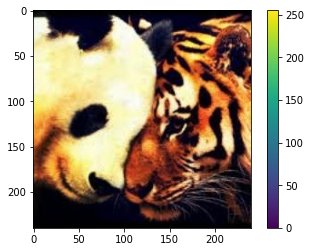

In [38]:
#Leer una imagen de prueba
img=cv2.imread("mix.jpg")
img_cvt= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.colorbar()
plt.grid(False)
plt.show()

In [40]:
#Hacer el cambio de tamaño de imagen
img2=img_cvt
img2=cv2.resize(img2, (img_size, img_size))
print(img2.shape)
img2= (np.expand_dims(img2,0))
print(img2.shape)

(150, 150, 3)
(1, 150, 150, 3)


In [42]:
#Se realiza una nueva predicción para la imagen mix.jpg
#Vamos a predecir que es la imagen previamente seleccionada img
predictions_single = model.predict(img2)
print("predictions_single")
print(predictions_single)
#realiza las sumas de las predicciones para dar un valor de 1
print(np.sum(predictions_single))
#toma el indice de la predicción que tiene el valor mas grande
print("np.argmax(predictions_single)")
print(np.argmax(predictions_single))
#Muestra la etiqueta de la prediccion realizada
print("class_names(np.argmax(predictions_single))")
print("Es un:", class_names[np.argmax(predictions_single)])

predictions_single
[[1. 0.]]
1.0
np.argmax(predictions_single)
0
class_names(np.argmax(predictions_single))
Es un: Tigre
